 coding: utf-8

 This page contains code associated with the following technical report:
 
 Lee, Jackson L., Ross Burkholder, Gallagher B. Flinn, and Emily R. Coppess. 2016. [Working with CHAT transcripts in Python](http://www.cs.uchicago.edu/research/publications/techreports/TR-2016-02). Technical Report TR-2016-02, Department of Computer Science, University of Chicago.
 
 Questions and comments can be directed to [Jackson Lee](http://jacksonllee.com/).
 
 All code runs in Python 3.4+. [Download](tech-report-2016.py) this page as a `.py` Python script.

# Importing all necessary libraries

In [2]:

%matplotlib inline

# libraries from the Python standard library
import os
from collections import Counter

# libraries for scientific computing and statistics
import pandas as pd
from scipy.stats.stats import pearsonr
import seaborn as sns
sns.set(color_codes=True)

# libraries for linguistic research
import pylangacq as pla
#import pycantonese as pc

# Working with MLU

In [4]:
pathin = '/Users/ethan/Documents/Scripts/Teaching/Development-of-Language/DoL_2017/Brown/Eve'

os.chdir(pathin)
eve = pla.read_chat('*.cha')  # reading in all 20 files from eve01.cha to eve20.cha


# Getting information of interest
- filenames
- age (in months) of Eve's in each CHAT file
- mean length of utterance in morphemes (MLUm) of each file

In [5]:
eve_filenames = eve.filenames(sorted_by_age=True)  # absolute-path filenames sorted by age
eve_ages = eve.age(month=True)  # dict(filename: age in months)
eve_MLUs = eve.MLUm()  # dict(filename: MLUm)
eve_age_MLU_pairs = [(eve_ages[fn], eve_MLUs[fn]) for fn in eve_filenames]  # list of (age, MLUm)

In [8]:
print(eve_age_MLU_pairs)

[(18.0, 2.4487704918032787), (18.0, 2.265687583444593), (19.0, 2.5728813559322035), (19.0, 2.7628458498023716), (20.0, 2.8528995756718527), (21.0, 3.1734317343173433), (21.0, 3.1231060606060606), (21.0, 3.3733055265901983), (22.0, 3.817658349328215), (22.0, 3.7915904936014626), (23.0, 4.157407407407407), (23.0, 3.8635346756152127), (24.0, 3.96218487394958), (24.0, 4.239130434782608), (25.0, 4.4502762430939224), (25.0, 4.421216848673947), (26.0, 4.46570796460177), (26.0, 4.286978508217446), (27.0, 4.347626339969372), (27.0, 3.163265306122449)]


In [9]:
pearsonr(*zip(*eve_age_MLU_pairs))  # passing (list of ages, list of MLUs) to pearsonr()

(0.83779857420844395, 4.0317091669915362e-06)

In [10]:
eve_MLU_df = pd.DataFrame({'Eve\'s age in months': [age for age, _ in eve_age_MLU_pairs],
                           'MLUm': [MLU for _, MLU in eve_age_MLU_pairs]})

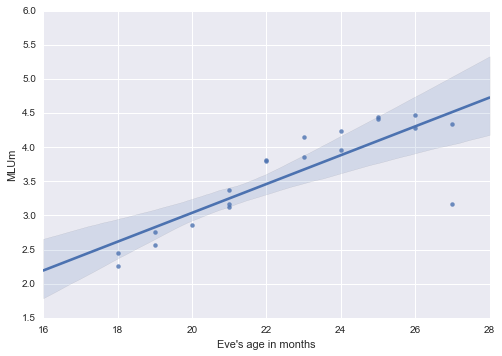

In [11]:
eve_MLU_plot = sns.regplot(x='Eve\'s age in months', y='MLUm', data=eve_MLU_df)

In [14]:
pathin = '/Users/ethan/Documents/Scripts/Teaching/Development-of-Language/DoL_2017/'

os.chdir(pathin)

tim_can = pla.read_chat('YipMatthews/Can/TimCan/*.cha')
sophie_can = pla.read_chat('YipMatthews/Can/SophieCan/*.cha')
alicia_can = pla.read_chat('YipMatthews/Can/AliciaCan/*.cha')

tim_eng = pla.read_chat('YipMatthews/Eng/TimEng/*.cha')
sophie_eng = pla.read_chat('YipMatthews/Eng/SophieEng/*.cha')
alicia_eng = pla.read_chat('YipMatthews/Eng/AliciaEng/*.cha')

In [15]:
def visualize_can_eng_MLUw(child_name, can_reader, eng_reader, legend=True):
    x_label = '{}\'s age in months'.format(child_name)
    
    can_filenames = can_reader.filenames(sorted_by_age=True)
    can_ages = can_reader.age(month=True)
    can_MLUs = can_reader.MLUw()
    
    eng_filenames = eng_reader.filenames(sorted_by_age=True)
    eng_ages = eng_reader.age(month=True)
    eng_MLUs = eng_reader.MLUw()
    
    df = pd.DataFrame({x_label: [can_ages[fn] for fn in can_filenames] + [eng_ages[fn] for fn in eng_filenames],
                       'MLUw': [can_MLUs[fn] for fn in can_filenames] + [eng_MLUs[fn] for fn in eng_filenames],
                       'Language': ['Cantonese']*len(can_reader) + ['English']*len(eng_reader)})
    
    MLU_plot = sns.lmplot(x=x_label, y='MLUw', hue='Language', data=df, markers=['o', 'x'],
                          legend=legend, legend_out=False)
    MLU_plot.set(xlim=(10, 45), ylim=(0, 4.5))
    MLU_plot.savefig('{}-MLU.pdf'.format(child_name))

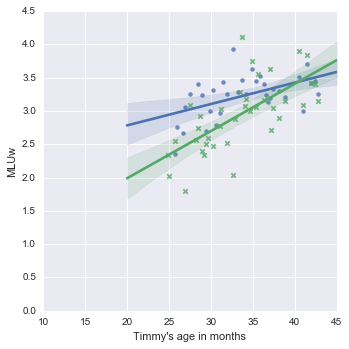

In [16]:
visualize_can_eng_MLUw('Timmy', tim_can, tim_eng, legend=False)  # figure saved: Timmy-MLU.pdf

In [18]:
pathin = '/Users/ethan/Documents/Scripts/Teaching/Development-of-Language/DoL_2017/Brown/'
os.chdir(pathin)

eve = pla.read_chat('Eve/*.cha')
adam = pla.read_chat('Adam/*.cha')

In [19]:
eve_filenames = eve.filenames(sorted_by_age=True)  # absolute-path filenames sorted by age
eve_ages = eve.age(month=True)  # dict(filename: age in months)
eve_MLUs = eve.MLUm()  # dict(filename: MLUm)
eve_age_MLU_pairs = [(eve_ages[fn], eve_MLUs[fn]) for fn in eve_filenames]  # list of (age, MLUm)

adam_filenames = adam.filenames(sorted_by_age=True)  # absolute-path filenames sorted by age
adam_ages = adam.age(month=True)  # dict(filename: age in months)
adam_MLUs = adam.MLUm()  # dict(filename: MLUm)
adam_age_MLU_pairs = [(adam_ages[fn], adam_MLUs[fn]) for fn in adam_filenames]  # list of (age, MLUm)

In [20]:
eve_MLU_df = pd.DataFrame({'Eve\'s age in months': [age for age, _ in eve_age_MLU_pairs],
                           'MLUm': [MLU for _, MLU in eve_age_MLU_pairs]})
adam_MLU_df = pd.DataFrame({'Adam\'s age in months': [age for age, _ in adam_age_MLU_pairs],
                           'MLUm': [MLU for _, MLU in adam_age_MLU_pairs]})

In [24]:
eve_MLU_df.head(3)

,Eve's age in months,MLUm
0,18.0,2.448770
1,18.0,2.265688
2,19.0,2.572881


In [25]:
adam_MLU_df.head(3)

,Adam's age in months,MLUm
0,27.133333,3.003155
1,27.600000,2.997674
2,28.100000,3.303944
